<font color=skyblue>Neural Network</font>

<font color=yellow>Loading Wine Data</font>

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('data/Wine.xlsx')
X = np.array(df.iloc[:, :-1]) # 排除最後一欄標籤 N x p
y = np.array(df.iloc[:, -1])

# Split data into training and testing sets
# 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30)

# Standardize data
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train) # 標準化訓練資料
X_test_ = scaler.fit_transform(X_test) # 標準化測試資料

accuracy for test data: 96.30%
              precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       0.96      0.96      0.96        23
           3       0.89      1.00      0.94         8

    accuracy                           0.96        54
   macro avg       0.95      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



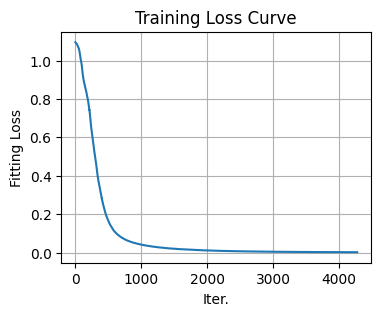

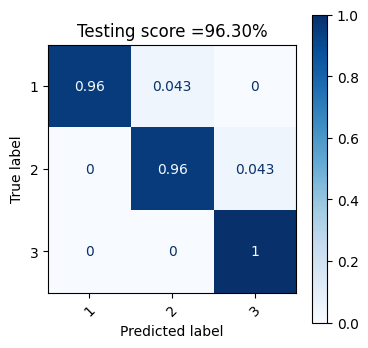

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# hidden_layers = (512,) # one hidden layer
# activation = 'relu' # the default
hidden_layers = (20,) # one hidden layer
activation = 'logistic' # the default
opts = dict(hidden_layer_sizes = hidden_layers, verbose = False, \
        activation = activation, tol = 1e-6, max_iter = int(1e6))
# solver = 'sgd' # not efficient, need more tuning
# solver = 'lbfgs' # not suitable here
solver = 'adam' # default solver
clf_MLP = MLPClassifier(solver = solver, **opts) 
clf_MLP.fit(X_train, y_train)
predictions = clf_MLP.predict(X_test)
# print("accuracy for tested data: {:.2f}%".format(100*np.mean(y_test_hat == y_test)))
print("accuracy for test data: {:.2f}%".format(100*clf_MLP.score(X_test, y_test)))
print(classification_report(y_test, predictions))

fig, ax = plt.subplots(1, 1, figsize=(4,3))
plt.plot(clf_MLP.loss_curve_)
plt.grid(True)
plt.title('Training Loss Curve')
plt.xlabel('Iter.')
plt.ylabel('Fitting Loss')
plt.show()

# Confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(4,4))
# Confusion matrix
title = 'Testing score ={:.2f}%'.format(100*clf_MLP.score(X_test, y_test))
disp = ConfusionMatrixDisplay.from_estimator(
        clf_MLP,
        X_test,
        y_test,
        xticks_rotation=45, #'vertical',
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize='true',
        ax = ax
    )
disp.ax_.set_title(title)
plt.show() 